In [28]:
import os
import csv
import sys

path = 'offtarget'

fileOut=open('offtarget.WXS.csv',"w")
fileOut.write('ID,cov\n')

for f in os.listdir(path):
    file=open("./offtarget/"+f)
    reader=csv.reader(file)
    cov=0.0
    count=0
    for line in reader:
            x=int(line[1])
            y=int(line[2])
            if y>x:
                if line[3]=="":
                    n=0.0
                else:
                    n=float(line[3])
                cov+=n/(y-x)
                count+=1
        
    fileOut.write(f.replace('.offtarget.cov','')+","+str(cov/count))
    fileOut.write("\n")

In [33]:
import pandas as pd
df = pd.read_csv('offtarget.WXS.csv')
df.head()

,ID,cov
0,003860a34c9b244a5d8435b220ca5673,5.390855
1,04dad306f9be80db39f4be578091aa11,4.966536
2,08886fe521e2ff176295468dc519d9f3,3.162184
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347


In [34]:
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
metadata.head()

,Unnamed: 0,patientBarcode,ID,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,clinical_data_cause_of_death,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,1,TCGA-05-4244,C347.TCGA-05-4244-01A-01D-1105-08.5,TCGA-05-4244-01A-01D-1105-08,WGS,NaN,NaN,NaN,NaN,NaN,...,70.0,TCGA,LUAD,1,8.0,7.0,7.0,7.0,34040b83-7e8a-4264-a551-b16621843e28,NaN
1,2,TCGA-05-4420,C347.TCGA-05-4420-01A-01D-1265-08.3,TCGA-05-4420-01A-01D-1265-08,WGS,NaN,NaN,NaN,NaN,NaN,...,41.0,TCGA,LUAD,1,7.0,6.0,7.0,5.0,3d2aa654-1b5f-4eb4-a1c2-af31f5760069,NaN
2,3,TCGA-05-4430,C347.TCGA-05-4430-01A-02D-1265-08.3,TCGA-05-4430-01A-02D-1265-08,WGS,NaN,NaN,NaN,NaN,NaN,...,59.0,TCGA,LUAD,1,8.0,7.0,7.0,7.0,3a23cdb5-2327-45ac-b0b5-d4afe038c757,NaN
3,4,TCGA-05-5423,C509.TCGA-05-5423-01A-01D-1625-08.1,TCGA-05-5423-01A-01D-1625-08,WGS,NaN,NaN,NaN,NaN,NaN,...,65.0,TCGA,LUAD,1,8.0,7.0,8.0,7.0,33e3f736-7990-4f7a-ac35-863247566541,NaN
4,5,TCGA-17-Z004,C347.TCGA-17-Z004-01A-01W-0746-08.1,TCGA-17-Z004-01A-01W-0746-08,WGS,NaN,NaN,NaN,NaN,NaN,...,NaN,TCGA,LUAD,0,NaN,NaN,NaN,NaN,0d96def2-cf0a-4659-94e5-f08744c57cc6,NaN


In [36]:
data=pd.merge(df, metadata, on='ID')
data.head()

,ID,cov,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,5.390855,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,04dad306f9be80db39f4be578091aa11,4.966536,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN
2,08886fe521e2ff176295468dc519d9f3,3.162184,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,NaN,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN


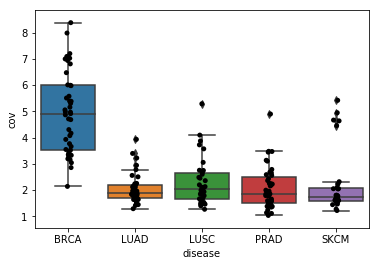

In [43]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov", data=data)
sns.stripplot(x="disease", y="cov", data=data, palette=["black"], jitter=0.05)


In [57]:
#gi|23898|emb|X12811.1|  28      2
#gi|23898|emb|X12811.1|  29      2
#X12811    5S              2231 bp
#Human 5.8S ribosomal RNA J01866.1 159 bp 
#Human 28S ribosomal RNA gene  5025 bp M11167.1
# X03205.1 Human 18S ribosomal RNA 1869 bp 

import os
import csv
import sys

path = './rDNA/cov/'

fileOut_5S=open('5S.WXS.csv',"w")
fileOut_5S.write('ID,cov.5S\n')

fileOut_58S=open('58S.WXS.csv',"w")
fileOut_58S.write('ID,cov.58S\n')

fileOut_28S=open('28S.WXS.csv',"w")
fileOut_28S.write('ID,cov.28S\n')

fileOut_18S=open('18S.WXS.csv',"w")
fileOut_18S.write('ID,cov.18S\n')

for f in os.listdir(path):
    file=open("./rDNA/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov_5S=0
    cov_58S=0
    cov_28S=0
    cov_18S=0
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        if ref=="gi|23898|emb|X12811.1|":
            cov_5S+=n
        elif ref=="J01866.1":
            cov_58S+=n
        elif ref=="M11167.1":
            cov_28S+=n
        elif ref=="X03205.1":
            cov_18S+=n
        else:
            print "ERROR"
            print line
            sys.exit(1)
            
        
    fileOut_5S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_5S/2231.0))
    fileOut_5S.write("\n")
    
    fileOut_58S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_58S/159.0))
    fileOut_58S.write("\n")
    
    fileOut_28S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_28S/5025.0))
    fileOut_28S.write("\n")
    
    fileOut_18S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_18S/1869.0))
    fileOut_18S.write("\n")

#003860a34c9b244a5d8435b220ca5673,1062574
    
#003860a34c9b244a5d8435b220ca5673 12709

    

In [58]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
df_5S = pd.read_csv('5S.WXS.csv')
df_58S = pd.read_csv('58S.WXS.csv')
df_28S = pd.read_csv('28S.WXS.csv')
df_18S = pd.read_csv('18S.WXS.csv')

df = pd.read_csv('offtarget.WXS.csv')
data=pd.merge(df_5S, metadata, on='ID')
data=pd.merge(data, df, on='ID')
data=pd.merge(data, df_58S, on='ID')
data=pd.merge(data, df_28S, on='ID')
data=pd.merge(data, df_18S, on='ID')


data['cov.5S.norm'] = data['cov.5S']/data['cov']
data['cov.58S.norm'] = data['cov.58S']/data['cov']
data['cov.28S.norm'] = data['cov.28S']/data['cov']
data['cov.18S.norm'] = data['cov.18S']/data['cov']


data.head()



,ID,cov.5S,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,patient_uuid,slides_0,cov,cov.58S,cov.28S,cov.18S,cov.5S.norm,cov.58S.norm,cov.28S.norm,cov.18S.norm
0,003860a34c9b244a5d8435b220ca5673,5.696549,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,NaN,...,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,5.390855,2834.899371,70.610746,130.710005,1.056706,525.871894,13.098245,24.246617
1,04dad306f9be80db39f4be578091aa11,16.363066,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,4.966536,946.503145,194.582090,261.747994,3.294664,190.576112,39.178632,52.702324
2,08886fe521e2ff176295468dc519d9f3,7.967727,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,NaN,...,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,3.162184,3307.685535,18.621891,157.719101,2.519691,1046.013017,5.888933,49.876638
3,09f52a751a3bd08f2fd4dcc61a046ed0,13.939041,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,52c35691-efca-42f5-a03e-02c9f872275c,NaN,4.683656,984.308176,200.056119,286.082397,2.976103,210.158105,42.713670,61.081007
4,0e66d92c70e71ca68bc7df03f140ac23,13.560287,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,NaN,...,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,3.325347,856.628931,165.016119,286.418941,4.077857,257.605910,49.623736,86.132057


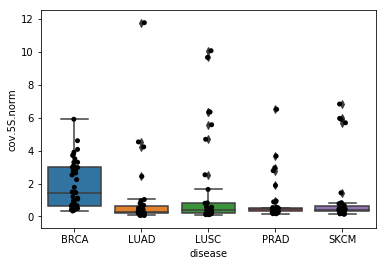

In [30]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.5S.norm", data=data)
sns.stripplot(x="disease", y="cov.5S.norm", data=data, palette=["black"], jitter=0.05)

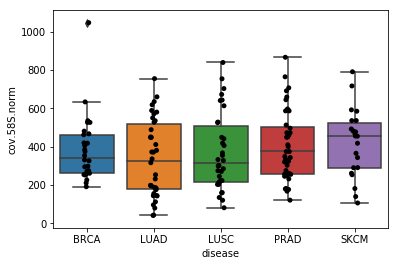

In [42]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.58S.norm", data=data)
sns.stripplot(x="disease", y="cov.58S.norm", data=data, palette=["black"], jitter=0.05)

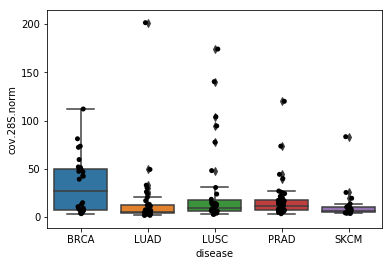

In [54]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.28S.norm", data=data)
sns.stripplot(x="disease", y="cov.28S.norm", data=data, palette=["black"], jitter=0.05)

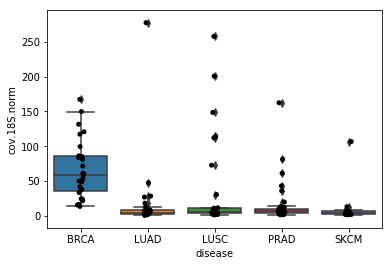

In [59]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.18S.norm", data=data)
sns.stripplot(x="disease", y="cov.18S.norm", data=data, palette=["black"], jitter=0.05)